# **Desarrollo de Modelo Predictivo** 🤓

Este modelo tiene como objetivo predecir cuántas calorías quemará una persona en su sesión de ejercicio, de a cuerdo con 3 variables: Edad, peso y duración de la sesión. Estas variables fueron pre seleccionadas en la etapa de calidad de datos.

**Pasos:**
1. Preparación de datos
2. División de los datos (70%-30%)
3. Aprendizaje del modelo (Tree, RandomForest, KNN, NN, SVM) -> 70%
4. Evaluación -> 30%
5. Comparación de modelos
6. Hiperparametrización del mejor modelo
7. Guardar el modelo con la mejor configuración posible

## **1. Preparación de datos**

In [61]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
#Cargamos los datos
data = pd.read_csv("datos_calorias.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       15000 non-null  int64  
 1   Weight    15000 non-null  float64
 2   Duration  15000 non-null  float64
 3   Calories  15000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 468.9 KB


In [63]:
#No hay que corregir tipos de datos
#Tampoco se crean dummies porque no hay variables categóricas

In [64]:
#Descripción de las variables numéricas
data.describe()

,Age,Weight,Duration,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,74.966867,15.530600,89.539533
std,16.980264,15.035657,8.319203,62.456978
min,20.000000,36.000000,1.000000,1.000000
25%,28.000000,63.000000,8.000000,35.000000
50%,39.000000,74.000000,16.000000,79.000000
75%,56.000000,87.000000,23.000000,138.000000
max,79.000000,132.000000,30.000000,314.000000


## **2. División de datos (70% - 30%)**

<Axes: >

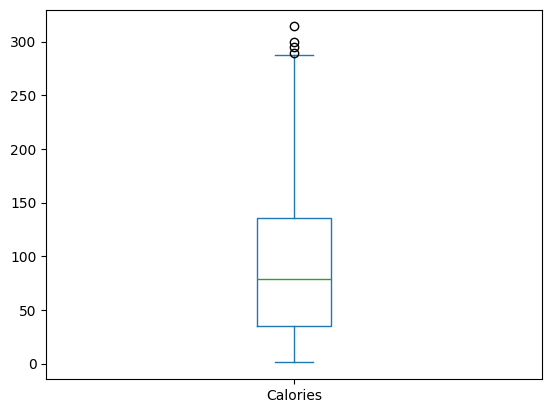

In [65]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Calories", axis = 1) # Variables predictoras
Y = data['Calories'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=None) #Como es regresión, no se hace muestreo estratificado
Y_train.plot(kind='box')

## **3. Aprendizaje -> 70% y 4. Evaluación -> 30%**

### **Tree**

**Aprendizaje**

In [66]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeRegressor
model_Tree = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=2, max_depth=None)
model_Tree.fit(X_train, Y_train)#70% entrenamiento
#Se omite la visualización del árbol porque visualmente no se entiende

DecisionTreeRegressor(min_samples_leaf=2)

**Evaluación**

In [67]:
#Dataframe para comparar los resultados
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])

In [68]:
#Evaluación del árbol 30%
from sklearn import metrics
Y_pred = model_Tree.predict(X_test) #30%

#Medidas de evaluación en regresión
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Arbol']=[mse, rmse, mae, mape,max]
medidas

,Arbol
mse,253.522554
rmse,15.922392
mae,11.064148
mape,0.156554
max,101.666667


<ipython-input-69-cb6afd438e19>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


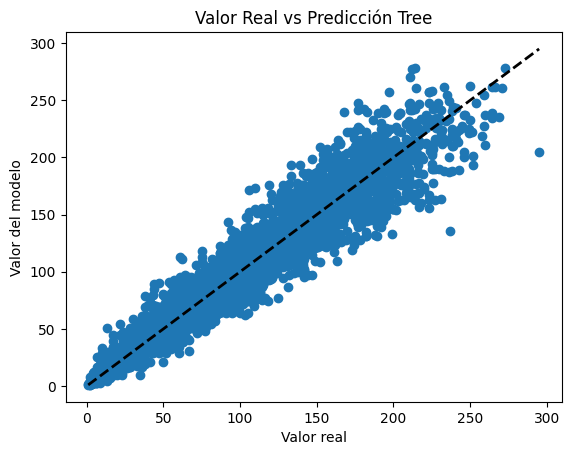

In [69]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Tree')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

### **Random Forest**

**Aprendizaje**

In [70]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100,  max_samples=0.7, criterion='squared_error',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%

RandomForestRegressor(max_samples=0.7, min_samples_leaf=2)

**Evaluación**

<ipython-input-71-bb3a8e44f2f1>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


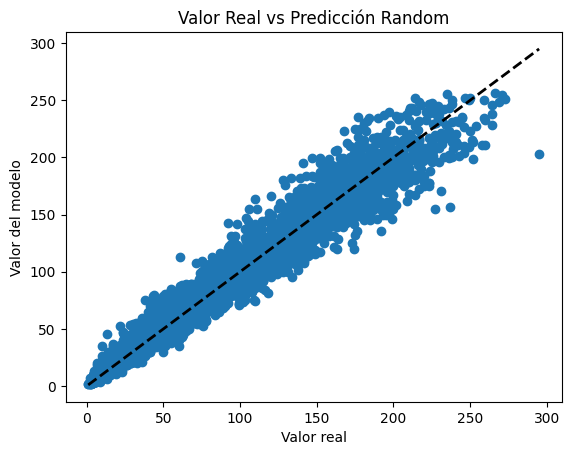

In [71]:
#Evaluación de Random
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['RF']=[mse, rmse, mae, mape,max]


#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Random')
plt.show()

## **KNN**

**Normalización de variables numéricas**

In [72]:
#Normalizacion de las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Age', 'Weight', 'Duration']]) #Se ajustan los paramatros de normalizacion

#se aplica la normalizacion al X_train y X_test
X_train[['Age', 'Weight', 'Duration']]= min_max_scaler.transform(X_train[['Age', 'Weight', 'Duration']])
X_test[['Age', 'Weight', 'Duration']]= min_max_scaler.transform(X_test[['Age', 'Weight', 'Duration']])
X_train.head()

,Age,Weight,Duration
13681,0.118644,0.458333,0.931034
11850,0.644068,0.729167,0.862069
10446,0.661017,0.552083,0.551724
203,0.576271,0.562500,0.758621
5276,0.271186,0.645833,0.344828


**Aprendizaje**

In [73]:
from sklearn.neighbors import  KNeighborsRegressor
model_Knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean') #minkowski
model_Knn.fit(X_train, Y_train) #70%

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

**Evaluación**

           Arbol          RF         Knn
mse   253.522554  171.219307  300.123778
rmse   15.922392   13.085080   17.324081
mae    11.064148    9.066488   12.085556
mape    0.156554    0.130628    0.172697
max   101.666667   92.332083  106.000000


<ipython-input-74-934f4b08975b>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


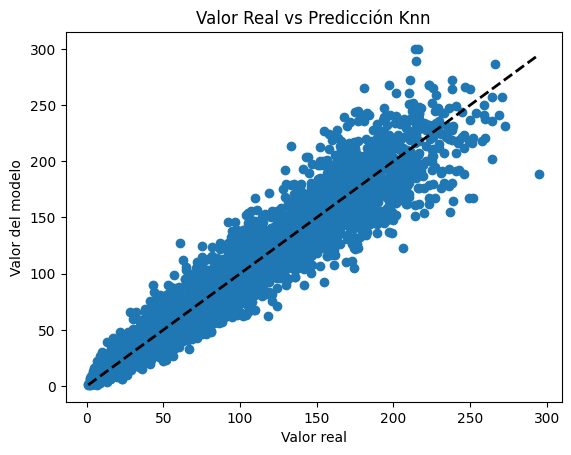

In [74]:
#Evaluación de KNN
from sklearn import metrics

Y_pred = model_Knn.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Knn']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Knn')
plt.show()

### **Red Neuronal**

**Aprendizaje**

In [75]:
from sklearn.neural_network import MLPRegressor

model_NN = MLPRegressor(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.3, momentum= 0.2, max_iter=500,  random_state=3)

model_NN.fit(X_train, Y_train)#70%

MLPRegressor(hidden_layer_sizes=16, learning_rate_init=0.3, max_iter=500,
             momentum=0.2, random_state=3)

**Evaluación**

           Arbol          RF         Knn                 NN
mse   253.522554  171.219307  300.123778  158.5704191996209
rmse   15.922392   13.085080   17.324081          12.592475
mae    11.064148    9.066488   12.085556           8.979935
mape    0.156554    0.130628    0.172697            0.15325
max   101.666667   92.332083  106.000000          76.248144


<ipython-input-76-bc5600b3db0e>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


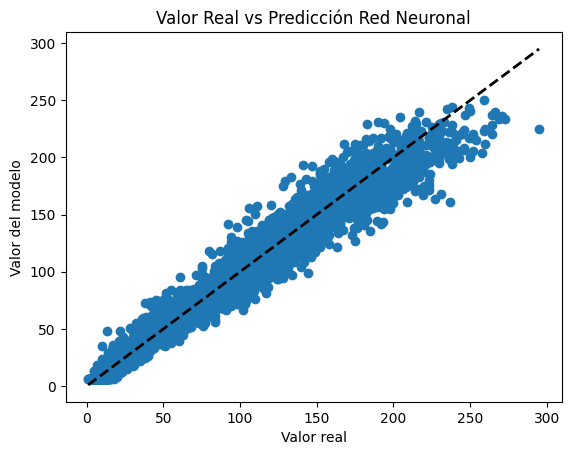

In [76]:
#Evaluación de la Red Neuronal
from sklearn import metrics

Y_pred = model_NN.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['NN']=[format(mse), rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Red Neuronal')
plt.show()

### **SVM**

**Aprendizaje**

In [77]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_SVR = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.5))
model_SVR.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.5, kernel='linear'))])

**Evaluación**

           Arbol          RF         Knn                 NN  \
mse   253.522554  171.219307  300.123778  158.5704191996209   
rmse   15.922392   13.085080   17.324081          12.592475   
mae    11.064148    9.066488   12.085556           8.979935   
mape    0.156554    0.130628    0.172697            0.15325   
max   101.666667   92.332083  106.000000          76.248144   

                     SVR  
mse   277.96152608695405  
rmse           16.672178  
mae             12.04513  
mape            0.336816  
max           102.705078  


<ipython-input-78-97e77d95a62c>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


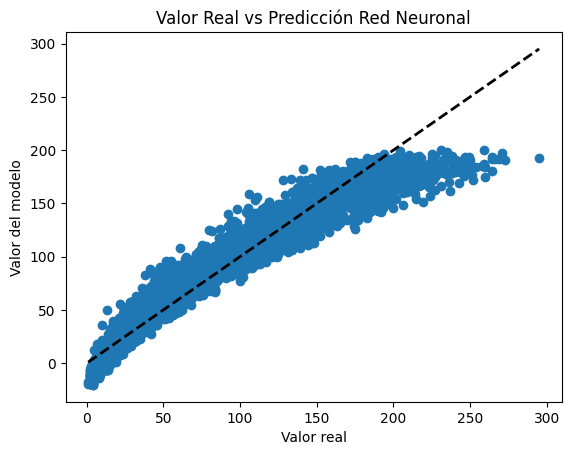

In [78]:
#Evaluación de SVR
from sklearn import metrics

Y_pred = model_SVR.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['SVR']=[format(mse), rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Red Neuronal')
plt.show()

## **5. Comparación de los modelos**

In [79]:
medidas

,Arbol,RF,Knn,NN,SVR
mse,253.522554,171.219307,300.123778,158.5704191996209,277.96152608695405
rmse,15.922392,13.085080,17.324081,12.592475,16.672178
mae,11.064148,9.066488,12.085556,8.979935,12.04513
mape,0.156554,0.130628,0.172697,0.15325,0.336816
max,101.666667,92.332083,106.000000,76.248144,102.705078


**Mejor modelo: Red Neuronal**

**Justifiación:** Es el modelo con mejor desempeño en las 4 medidas principales para determinar el desempeño de un modelo de regresión
(MSE, RMSE, MAE, MAPE)

- MSE  -> 158.57 (Menor)
- RMSE -> 12.592 (Menor)
- MAE  -> 8.972  (Menor)
- MAPE -> 0.153  (Menor)

## **6. Hiperparametrización de la Red Neuronal**

In [80]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

In [81]:
#Medida de evaluación del mejor modelo
medidas_CV= pd.DataFrame(index=['MSE'])

In [85]:
from sklearn.neural_network import MLPRegressor
modelNN = MLPRegressor()


# Definir los parametros
random_state=[1] #Semilla para generar número pseudoaleatorios
solver=['sgd'] # Regla de aprendizaje ['adam','sgd','lbfgs']
learning_rate=['constant'] #tasa de aprendizaje 'adaptive'
learning_rate_init=[0.001, 0.01, 0.05] #valor tasa de aprendizaje 0-2
momentum=[0.3, 0.5] #momentum 0-1
activation=['logistic', 'relu'] #'identity’, ‘logistic’, ‘tanh’, ‘relu’
hidden_layer_sizes=[4, 20,[8, 20]] # neuronas de la capa oculta ((input+output)/2)
max_iter = [200,300,500] #iteraciones

In [86]:
#Grid
param_grid = dict(random_state=random_state,solver=solver,activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate=learning_rate,
                  learning_rate_init=learning_rate_init, momentum=momentum)
grid = GridSearchCV(estimator=modelNN, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelNN= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas_CV['NN']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.5, 'random_state': 1, 'solver': 'sgd'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
medidas_CV['NN']

,NN
MSE,-151.836531


De a cuerdo con lo anterior, hubo una mejora en el MSE. Pasó de 158.57 a 151.83. Por lo ranto el RMSE, el MAE y el MAPE también mejoraron

## **7. Guardar el modelo**

In [89]:
#Se guarda el modelo
import pickle
filename = 'mejor-modelo-nn.pkl'
variables= X.columns._values
pickle.dump([modelNN,variables,min_max_scaler], open(filename, 'wb')) #write